### Short Case-Study on Click-Through Dataset

#### Summary:
I've tried to do a short case study on click-through data set in which the actual goal is to predict the probabilities of the click (0/1). I've tried to make use of the fundamental concepts and techniques instead of the very advanced ones.
I've tried to explore features and their individual relationships with the target variable - clich which has two classes - 0/1. There is no need to perform extensive data processing but a few useful things that could be done are: Label-Encoding/hot-encoding a few of the site,domain and device features, formatting the hour column to carry out more purposeful analysis. A few of the feature-selection techniques that I experimented with were l1 penalty, useful results from data exploration and RFE. There is a lot of room for improvement in the application of feature-selection techniques.I tried to play with the polynomial features to see if there is any improvement in the confusion matrix as all the models approximately yielded the same accuracy.  

#### Scope of Improvement:
One of the few things that I noticed about the dataset was that it is unbalanced. Sampling techniques could have been applied to solve this problem. Feature-Selection and Model selection could have been better since there is no significant improvement in any of the models selected.The entire machine-learning pipeline could have been reiterated over to yield better results. For example - extensive data exploration techniques can yield better intuition in building models. Experimentation with different features can lead to better models and eventually better results in the evaluation phase.    

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
import matplotlib as plt

In [9]:
data = pd.read_csv("sampled_training.csv")

In [10]:
data[:25]

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,0,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,1,2,20596,320,50,2161,0,35,100148,157
1,10006958186789044052,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,18993,320,50,2161,0,35,100034,157
2,10011650513707909570,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,21611,320,50,2480,3,297,100111,61
3,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,4687,320,50,423,2,39,100148,32
4,10029289556764215760,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,100084,79
5,1002948443498545577,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,1779deee,2347f47a,...,1,0,20596,320,50,2161,0,35,-1,157
6,10033341691920548518,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,100084,79
7,10039148490202159706,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,92e72531,d9b5648e,...,1,0,21611,320,50,2480,3,297,100111,61
8,10039475935406792420,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
9,10040214148118137106,1,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79


In [11]:
data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

### Class-Imbalance Check for the Target variable

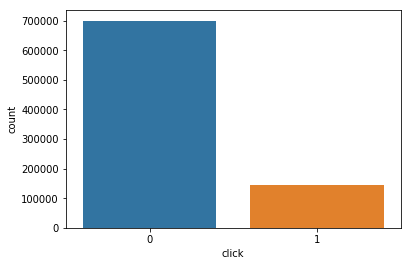

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='click',data=data)
plt.show()

#### Note: There is a high imbalance in the dataset and it is important to know the actual percentage of clicks and as per the suspicion, there is only a small percentage of actual clicks.

In [13]:
data['click'].mean()

0.17027108412309633

Data Intuition: The Dataset contains a few categorical features and a lot of anonymized features due to which it is not possible to get a clear idea or intuition about the possible predictors. Therefore, next phase will be to explore individual relationships between the target and predictors.

## Data Exploration of  Variables

### C1

In [14]:
data.C1.describe()

count    843502.000000
mean       1004.959553
std           1.132949
min        1001.000000
25%        1005.000000
50%        1005.000000
75%        1005.000000
max        1012.000000
Name: C1, dtype: float64

It is interesting to see how 1005 appears at 25%,50% and 75% and how mean is extremely close to 1005. Also I think it would be 
helpful to check out unique values of C1 and their CTR.Essentially, we are interested in identifying and knowing more about features and categories of those classes (although anonymized) that have high/low click through rates (CTR) so that those features can be used for prediction of clicks (0/1).

CTR = Number of clicks/Number of impressions(times the add is shown)

In [15]:
data.groupby('C1').click.mean()

C1
1001    0.018315
1002    0.212606
1005    0.170058
1007    0.044578
1008    0.164634
1010    0.091045
1012    0.068479
Name: click, dtype: float64

We can see a few of the values deviating from the actual CTR and I think we should consider this as our predictor. 

In [ ]:
plt.show()

This approach of calculating CTR seems like a good option for selecting probable features. I'm going to replicate the same analysis for other features. 

### C14

In [16]:
data.groupby('C14').click.mean()

C14
375      0.239443
376      0.285714
377      0.233745
380      0.194190
381      0.346667
451      0.416667
452      0.138929
454      0.115646
456      0.130582
463      0.128674
787      0.077778
1037     0.291399
1038     0.231041
1039     0.243137
1266     0.250000
1267     0.333333
1268     0.250000
1269     0.000000
1270     0.416667
1272     0.000000
1275     0.315789
1276     0.291667
1278     0.181818
4407     0.083333
4518     0.053333
4687     0.248480
5296     0.225078
5299     0.234467
6360     0.205882
6361     0.190123
           ...   
23765    0.307692
23805    0.043478
23808    0.000000
23809    0.000000
23810    0.000000
23811    0.000000
23812    0.000000
23813    0.000000
23814    0.063725
23815    0.214286
23816    0.175926
23817    0.121212
23818    0.144444
23819    0.135417
23820    0.132653
23821    0.152174
23822    0.156627
23823    0.123711
23824    0.067308
23825    0.152174
23826    0.500000
23827    0.000000
23828    0.000000
23830    0.000000
23831 

#### Note: Distribution of CTR seems non-intuitive and not explanatory. Also, All the non-relevant data exploration yielding no useful results have been excluded from this notebook during the process of notebook clean-up.  

### C15

In [17]:
data.C15.describe()

count    843502.000000
mean        318.861537
std          21.730624
min         120.000000
25%         320.000000
50%         320.000000
75%         320.000000
max        1024.000000
Name: C15, dtype: float64

In [18]:
data.groupby('C15').click.mean()

C15
120     0.010526
216     0.128220
300     0.376449
320     0.158500
480     0.219512
728     0.057357
768     0.320000
1024    0.250000
Name: click, dtype: float64

In [19]:
print("Impression Percentage Distribution in C15")
print(data.C15.value_counts()/len(data))

Impression Percentage Distribution in C15
320     0.933709
300     0.056028
216     0.008100
728     0.001902
120     0.000113
1024    0.000071
480     0.000049
768     0.000030
Name: C15, dtype: float64


### C16

In [20]:
data.C16.describe()

count    843502.000000
mean         60.286297
std          47.965820
min          20.000000
25%          50.000000
50%          50.000000
75%          50.000000
max        1024.000000
Name: C16, dtype: float64

In [21]:
data.groupby('C16').click.mean()

C16
20      0.010526
36      0.128220
50      0.158257
90      0.057357
250     0.431632
320     0.219512
480     0.215951
768     0.250000
1024    0.320000
Name: click, dtype: float64

In [22]:
print("Impression Percentage Distribution in C16")
print(data.C16.value_counts()/len(data))

Impression Percentage Distribution in C16
50      0.941901
250     0.044938
36      0.008100
480     0.002899
90      0.001902
20      0.000113
768     0.000071
320     0.000049
1024    0.000030
Name: C16, dtype: float64


### Banner Position

In [23]:
data.banner_pos.describe()

count    843502.000000
mean          0.293501
std           0.515961
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           7.000000
Name: banner_pos, dtype: float64

In [24]:
print("Impression Percentage per Banner Position")
print(data.banner_pos.value_counts()/len(data))

Impression Percentage per Banner Position
0    0.715720
1    0.282248
7    0.001222
2    0.000333
4    0.000212
5    0.000194
3    0.000070
Name: banner_pos, dtype: float64


0 and 1 pos seems important since that is where most data is located.

In [25]:
data.groupby('banner_pos').click.mean()

banner_pos
0    0.163545
1    0.186881
2    0.103203
3    0.118644
4    0.150838
5    0.164634
7    0.298739
Name: click, dtype: float64

Although, it can be helpful to note that even though 0 and 1 positions are where our data is most located, 7th position 
seems pretty important as we have our heighest CTR there.

### Device-Type 

In [26]:
data.groupby("device_type").click.mean()

device_type
0    0.212606
1    0.169607
4    0.092953
5    0.079595
Name: click, dtype: float64

Heighest CTR is given by the device type 0.

In [27]:
print("Impression Percentage per Device Type")
print(data.device_type.value_counts()/len(data))

Impression Percentage per Device Type
1    0.914977
0    0.060412
4    0.021095
5    0.003515
Name: device_type, dtype: float64


In [28]:
data.device_type.describe()

count    843502.000000
mean          1.016934
std           0.553377
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: device_type, dtype: float64

In [29]:
Target = data["click"]
traindata=data.drop("click",axis=1)

In [30]:
traindata.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,07d7df22,...,1,2,20596,320,50,2161,0,35,100148,157
1,10006958186789044052,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,f95efa07,...,1,0,18993,320,50,2161,0,35,100034,157
2,10011650513707909570,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,...,1,0,21611,320,50,2480,3,297,100111,61
3,10022961149355219548,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,...,1,0,4687,320,50,423,2,39,100148,32
4,10029289556764215760,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,2,15706,320,50,1722,0,35,100084,79


In [34]:
unames=['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
testdata = pd.read_csv("sampled_test.csv",header=None, names=unames)

In [35]:
testdata.head(1)

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,635176803480460379,14103000,1002,0,85f751fd,c4e18dd6,50e219e0,27550a3c,7801e8d9,07d7df22,...,0,0,23553,300,50,2699,0,163,-1,212


### Dataprocessing:
A quick Data-type check to see if any preprocessing is required. Usually, strings or identifier variables are not accepted in the fit() and due to which label-encoding or hot-encoding is required. 


In [36]:
for name, dtype in data.dtypes.iteritems():
    print(name, dtype)



id uint64
click int64
hour int64
C1 int64
banner_pos int64
site_id object
site_domain object
site_category object
app_id object
app_domain object
app_category object
device_id object
device_ip object
device_model object
device_type int64
device_conn_type int64
C14 int64
C15 int64
C16 int64
C17 int64
C18 int64
C19 int64
C20 int64
C21 int64


### Data Preprocessing: Label-Encoding Site, App and Domain features

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(traindata.site_id.unique()))
print(len(list(le.classes_)))
traindata['site_id']=le.transform(traindata.site_id) 


2366


In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(traindata.site_domain.unique()))
print(len(list(le.classes_)))
traindata['site_domain']=le.transform(traindata.site_domain) 

2506


In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(traindata.app_id.unique()))
print(len(list(le.classes_)))
traindata['app_id']=le.transform(traindata.app_id) 

2211


In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(traindata.app_domain.unique()))
print(len(list(le.classes_)))
traindata['app_domain']=le.transform(traindata.app_domain) 

156


In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(traindata.device_id.unique()))
print(len(list(le.classes_)))
traindata['device_id']=le.transform(traindata.device_id) 

78975


In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(traindata.device_ip.unique()))
print(len(list(le.classes_)))
traindata['device_ip']=le.transform(traindata.device_ip) 

153806


In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(traindata.device_model.unique()))
print(len(list(le.classes_)))
traindata['device_model']=le.transform(traindata.device_model) 

4415


In [44]:
for name, dtype in traindata.dtypes.iteritems():
    print(name, dtype)

id uint64
hour int64
C1 int64
banner_pos int64
site_id int32
site_domain int32
site_category object
app_id int32
app_domain int32
app_category object
device_id int32
device_ip int32
device_model int32
device_type int64
device_conn_type int64
C14 int64
C15 int64
C16 int64
C17 int64
C18 int64
C19 int64
C20 int64
C21 int64


In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(traindata.app_category.unique()))
print(len(list(le.classes_)))
traindata['app_category']=le.transform(traindata.app_category) 

28


In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(traindata.site_category.unique()))
print(len(list(le.classes_)))
traindata['site_category']=le.transform(traindata.site_category) 

21


In [47]:
traindata.head(1)

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,14102100,1005,0,1468,112,19,2045,68,0,...,1,2,20596,320,50,2161,0,35,100148,157


##### Choice of Machine-Learning Algorithm: 
Logistic Regression works the best for our case-study since it is not a very computer-intensive algorithm and is definitely a very fast and feasible model. More so, it is very interpretable which makes it easier to understand, improve and evaluate the model. Also, it solves the main objective of our case study which is to output the probabilities of the click which is given by predict_proba() 

##### Model-Selection and Model-Evaluation

#### Baseline Model

In [60]:
# Accuracy on Train-Data Set 
clf = LogisticRegression(fit_intercept=True)
clf.fit(traindata, Target)
print (clf.intercept_, clf.coef_)
print ('Accuracy on Train Data Set: {0}'.format(clf.score(traindata, Target)))


C:\Users\dgariba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[-2.94233117e-38] [[-1.38425113e-19 -4.14942453e-31 -2.95738746e-35 -7.23277820e-39
  -3.37804524e-35 -5.12043788e-35 -2.60798070e-37 -4.91445782e-35
  -1.96945310e-36 -1.34530913e-37 -1.45599725e-33 -2.22748502e-33
  -6.48652731e-35 -3.20412221e-38 -1.63467746e-38 -5.74660841e-34
  -9.44917985e-36 -1.18717523e-36 -6.43672327e-35 -3.83307596e-38
  -6.32215175e-36 -1.83018638e-33 -2.79444589e-36]]
Accuracy on Train Data Set: 0.8297289158769037


In [84]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

confusion_matrix(clf.predict(train1),Target)

array([[699878, 143624],
       [     0,      0]], dtype=int64)

Even though the accuracy is in good shape, confusion matrix yields very bad results.

##### A note on Model Evaluation and Accuracy: 
Although the probability doesn't look that bad it is to be noted that there is a high imbalance in the dataset in the classes. The fact that only 17% belong to 1 and rest to 0 contributes to a great increase in the accuracy and that is the reason confusion matrix and ROC curve seems to be a reasonable for evaluating different models. The idea is to basically maximize the area under the curve.

##### Model-2 built on the basis of results from data exploration

In [81]:
clf1 = LogisticRegression(fit_intercept=True)
clf1.fit(train1, Target)
print (clf1.intercept_, clf1.coef_)
print ('Accuracy on Train Data Set: {0}'.format(clf1.score(train1, Target)))

C:\Users\dgariba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.00090421] [[-0.0007582  -0.0027444   0.00560373 -0.38220128  0.23072132]]
Accuracy on Train Data Set: 0.8280359738329014


In [82]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

confusion_matrix(clf1.predict(train1),Target)

array([[697899, 143073],
       [  1979,    551]], dtype=int64)

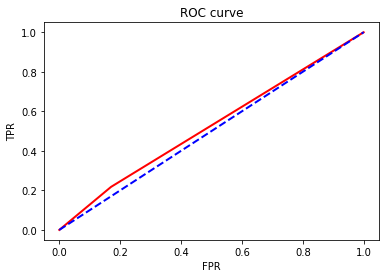

In [83]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(clf1.predict(train1),Target,drop_intermediate=False)
##Adding the ROC
plt.plot(fpr, tpr, color='red',
lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#### Feature-Selection via RFE 

In [ ]:
from sklearn.feature_selection import RFE
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 5)
#Transforming data using RFE
X_rfe = rfe.fit_transform(traindata,Target)  
#Fitting the data to model
model.fit(X_rfe,Target)
print(rfe.support_)
print(rfe.ranking_)

#### Model-3

In [55]:
train2 = traindata[['id','hour','device_id','device_ip','C20']]

In [85]:
clf2 = LogisticRegression(fit_intercept=True)
clf2.fit(train2, Target)
print (clf2.intercept_, clf2.coef_)
print ('Accuracy on Train Data Set: {0}'.format(clf2.score(train2, Target)))

C:\Users\dgariba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[-2.94233117e-38] [[-1.38425113e-19 -4.14942453e-31 -1.45599725e-33 -2.22748502e-33
  -1.83018638e-33]]
Accuracy on Train Data Set: 0.8297289158769037


In [86]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

confusion_matrix(clf.predict(train2),Target)

array([[699878, 143624],
       [     0,      0]], dtype=int64)

C:\Users\dgariba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


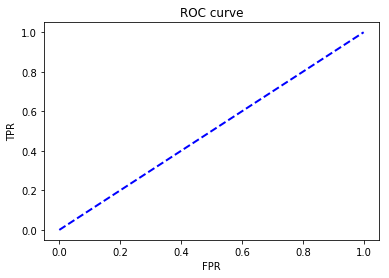

In [87]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(clf2.predict(train2),Target,drop_intermediate=False)
##Adding the ROC
plt.plot(fpr, tpr, color='red',
lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#### Polynomial Feature Tranformation

*Data Exploration and Feature-Selection techniques did not improve the train data set accuracy. My next step would be to include higher-order terms of the features that I initially selected from the data-exploration step.Although this approach can lead to over-fitting but it is worth giving a try!*

In [88]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
polydata = poly.fit_transform(train1)
#X_train,X_test,y_train,y_test=train_test_split(polydata,Target,test_size=0.5,random_state=3)
clf4 = LogisticRegression(fit_intercept=True)
clf4.fit(polydata, Target)
print (clf4.intercept_, clf4.coef_)
print ('Accuracy from sk-learn: {0}'.format(clf4.score(polydata, Target)))

C:\Users\dgariba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[3.21519292e-15] [[ 3.21519292e-15  2.15361959e-12  6.70531205e-13  1.71634721e-13
  -3.39005426e-13  3.23500532e-13  1.08083382e-09  3.38827750e-10
   9.93979739e-11 -3.41703065e-10  3.24656710e-10  9.90643889e-11
   5.83891389e-12 -1.01519416e-10  1.02047411e-10 -5.24879201e-11
  -2.26489150e-11  7.57962320e-13 -8.12117989e-13  1.05521526e-13
  -8.86491176e-14 -3.27303749e-09  3.68422440e-09  2.62893288e-08
  -3.44424705e-07  3.25814184e-07 -5.73559553e-10 -1.65270047e-08
  -1.02298866e-07  1.02412746e-07 -6.31565675e-08 -2.28595569e-08
   6.63579868e-10 -8.19546754e-10  1.04497913e-10 -9.10774007e-11
  -5.65746378e-09  7.39025371e-09 -2.71785118e-08  3.25760313e-08
   2.78367632e-08 -6.81767970e-09 -1.77402047e-10 -2.14286426e-10
   3.56168120e-11 -3.90838230e-11  2.59719518e-08 -3.84933078e-09
  -6.54342951e-09 -6.77357672e-11 -5.46048256e-11 -1.10998335e-10
  -2.69107000e-12 -7.63785102e-13 -9.97438055e-13 -2.50809911e-12]]
Accuracy from sk-learn: 0.8295925795078138


In [89]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

confusion_matrix(clf4.predict(polydata),Target)

array([[699732, 143593],
       [   146,     31]], dtype=int64)

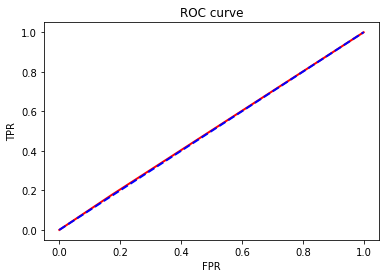

In [91]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(clf4.predict(polydata),Target,drop_intermediate=False)
##Adding the ROC
plt.plot(fpr, tpr, color='red',
lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Model-Selection: I think the best model suited for this problem according to my case study consists of features: C1,C15,C16,device_type and banner_pos. The features were a result of the data exploration. Ofcourse extensive featire-selection techniques and data-exploration can yield better results. Overfitting was checked by splitting the training set into 70:30 ratio for this model. Polynomial model have higher chances of over-fitting and other models did poorly.  


#### *Predict Probabibilities for the Test-Data Set*

In [92]:
testdata1 = testdata[['C1','C15','C16','device_type','banner_pos']]

In [96]:
result=clf1.predict_proba(testdata1)

In [97]:
df = pd.DataFrame(result)
df.to_csv('Result.csv',index=False)